In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score

In [2]:
hcc = pd.read_excel('hcc-data-complete-balanced.xlsx')
hcc.head()

,Gender,Symptoms,Alcohol,HBsAg,HBeAg,HBcAb,HCVAb,Cirrhosis,Endemic,Smoking,...,ALP,TP,Creatinine,Nodule,Major_Dim,Dir_Bil,Iron,Sat,Ferritin,Class
0,1,0,1,0,0,0,0,1,0,1,...,150,"7,1","0,7",1,"3,5","0,5","52,5",37,856,1
1,0,0,0,0,0,0,1,1,0,1,...,120,7,"0,58",1,"1,8","0,85",32,10,18,1
2,1,0,1,1,0,1,0,1,0,1,...,109,7,"2,1",5,13,"0,1",28,6,16,1
3,1,1,1,0,0,0,0,1,0,1,...,174,"8,1","1,11",2,"15,7","0,2",131,78,1316,0
4,1,1,1,1,0,1,0,1,0,1,...,109,"6,9","1,8",1,9,"0,1",59,15,22,1


## Data Preprocessing

In [3]:
hcc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 50 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Gender          204 non-null    int64 
 1   Symptoms        204 non-null    int64 
 2   Alcohol         204 non-null    int64 
 3   HBsAg           204 non-null    int64 
 4   HBeAg           204 non-null    int64 
 5   HBcAb           204 non-null    int64 
 6   HCVAb           204 non-null    int64 
 7   Cirrhosis       204 non-null    int64 
 8   Endemic         204 non-null    int64 
 9   Smoking         204 non-null    int64 
 10  Diabetes        204 non-null    int64 
 11  Obesity         204 non-null    int64 
 12  Hemochro        204 non-null    int64 
 13  AHT             204 non-null    int64 
 14  CRI             204 non-null    int64 
 15  HIV             204 non-null    int64 
 16  NASH            204 non-null    int64 
 17  Varices         204 non-null    int64 
 18  Spleno    

In [4]:
# Convert entire DataFrame to string

hcc = hcc.applymap(str)
print(hcc.dtypes)


Gender            object
Symptoms          object
Alcohol           object
HBsAg             object
HBeAg             object
HBcAb             object
HCVAb             object
Cirrhosis         object
Endemic           object
Smoking           object
Diabetes          object
Obesity           object
Hemochro          object
AHT               object
CRI               object
HIV               object
NASH              object
Varices           object
Spleno            object
PHT               object
PVT               object
Metastasis        object
Hallmark          object
Age               object
Grams_day         object
Packs_year        object
PS                object
Encephalopathy    object
Ascites           object
INR               object
AFP               object
Hemoglobin        object
MCV               object
Leucocytes        object
Platelets         object
Albumin           object
Total_Bil         object
ALT               object
AST               object
GGT               object


### Replacing ',' by '.'

In [5]:
data = hcc.applymap(lambda x: str(x.replace(',','.')))

In [6]:
data.head()

,Gender,Symptoms,Alcohol,HBsAg,HBeAg,HBcAb,HCVAb,Cirrhosis,Endemic,Smoking,...,ALP,TP,Creatinine,Nodule,Major_Dim,Dir_Bil,Iron,Sat,Ferritin,Class
0,1,0,1,0,0,0,0,1,0,1,...,150,7.1,0.7,1,3.5,0.5,52.5,37,856,1
1,0,0,0,0,0,0,1,1,0,1,...,120,7,0.58,1,1.8,0.85,32,10,18,1
2,1,0,1,1,0,1,0,1,0,1,...,109,7,2.1,5,13,0.1,28,6,16,1
3,1,1,1,0,0,0,0,1,0,1,...,174,8.1,1.11,2,15.7,0.2,131,78,1316,0
4,1,1,1,1,0,1,0,1,0,1,...,109,6.9,1.8,1,9,0.1,59,15,22,1


In [7]:
# Converting columns to type float

data = data.astype("float")
print(data.dtypes)

Gender            float64
Symptoms          float64
Alcohol           float64
HBsAg             float64
HBeAg             float64
HBcAb             float64
HCVAb             float64
Cirrhosis         float64
Endemic           float64
Smoking           float64
Diabetes          float64
Obesity           float64
Hemochro          float64
AHT               float64
CRI               float64
HIV               float64
NASH              float64
Varices           float64
Spleno            float64
PHT               float64
PVT               float64
Metastasis        float64
Hallmark          float64
Age               float64
Grams_day         float64
Packs_year        float64
PS                float64
Encephalopathy    float64
Ascites           float64
INR               float64
AFP               float64
Hemoglobin        float64
MCV               float64
Leucocytes        float64
Platelets         float64
Albumin           float64
Total_Bil         float64
ALT               float64
AST         

In [8]:
data.head()

,Gender,Symptoms,Alcohol,HBsAg,HBeAg,HBcAb,HCVAb,Cirrhosis,Endemic,Smoking,...,ALP,TP,Creatinine,Nodule,Major_Dim,Dir_Bil,Iron,Sat,Ferritin,Class
0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,150.0,7.1,0.70,1.0,3.5,0.50,52.5,37.0,856.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,...,120.0,7.0,0.58,1.0,1.8,0.85,32.0,10.0,18.0,1.0
2,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,109.0,7.0,2.10,5.0,13.0,0.10,28.0,6.0,16.0,1.0
3,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,174.0,8.1,1.11,2.0,15.7,0.20,131.0,78.0,1316.0,0.0
4,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,109.0,6.9,1.80,1.0,9.0,0.10,59.0,15.0,22.0,1.0


### spilitting features and labels

In [9]:
X = data.iloc[:,:-1]  # all features of the dataset 
X.head()

,Gender,Symptoms,Alcohol,HBsAg,HBeAg,HBcAb,HCVAb,Cirrhosis,Endemic,Smoking,...,GGT,ALP,TP,Creatinine,Nodule,Major_Dim,Dir_Bil,Iron,Sat,Ferritin
0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,183.0,150.0,7.1,0.70,1.0,3.5,0.50,52.5,37.0,856.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,...,77.0,120.0,7.0,0.58,1.0,1.8,0.85,32.0,10.0,18.0
2,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,202.0,109.0,7.0,2.10,5.0,13.0,0.10,28.0,6.0,16.0
3,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,94.0,174.0,8.1,1.11,2.0,15.7,0.20,131.0,78.0,1316.0
4,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,173.0,109.0,6.9,1.80,1.0,9.0,0.10,59.0,15.0,22.0


In [10]:
Y = hcc.iloc[:,-1]  # target label (0 or 1)
Y.head()

0    1
1    1
2    1
3    0
4    1
Name: Class, dtype: object

In [11]:
y = Y.astype(int)
y

0      1
1      1
2      1
3      0
4      1
      ..
199    0
200    0
201    0
202    0
203    0
Name: Class, Length: 204, dtype: int32

In [12]:
print(X)
print(Y)

     Gender  Symptoms  Alcohol  HBsAg  HBeAg  HBcAb  HCVAb  Cirrhosis  \
0       1.0       0.0      1.0    0.0    0.0    0.0    0.0        1.0   
1       0.0       0.0      0.0    0.0    0.0    0.0    1.0        1.0   
2       1.0       0.0      1.0    1.0    0.0    1.0    0.0        1.0   
3       1.0       1.0      1.0    0.0    0.0    0.0    0.0        1.0   
4       1.0       1.0      1.0    1.0    0.0    1.0    0.0        1.0   
..      ...       ...      ...    ...    ...    ...    ...        ...   
199     0.0       0.0      0.0    0.0    0.0    0.0    1.0        1.0   
200     0.0       1.0      1.0    0.0    0.0    0.0    0.0        1.0   
201     1.0       1.0      1.0    0.0    0.0    0.0    0.0        1.0   
202     1.0       1.0      1.0    0.0    0.0    0.0    0.0        1.0   
203     0.0       1.0      0.0    0.0    0.0    0.0    0.0        0.0   

     Endemic  Smoking  ...    GGT    ALP   TP  Creatinine  Nodule  Major_Dim  \
0        0.0      1.0  ...  183.0  150.0  7

### Scaling the dataset

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
numvars = ['Gender', 'Symptoms', 'Alcohol', 'HBsAg', 'HBeAg', 'HBcAb', 'HCVAb',
       'Cirrhosis', 'Endemic', 'Smoking', 'Diabetes', 'Obesity', 'Hemochro',
       'AHT', 'CRI', 'HIV', 'NASH', 'Varices', 'Spleno', 'PHT', 'PVT',
       'Metastasis', 'Hallmark', 'Age', 'Grams_day', 'Packs_year', 'PS',
       'Encephalopathy', 'Ascites', 'INR', 'AFP', 'Hemoglobin', 'MCV',
       'Leucocytes', 'Platelets', 'Albumin', 'Total_Bil', 'ALT', 'AST', 'GGT',
       'ALP', 'TP', 'Creatinine', 'Nodule', 'Major_Dim', 'Dir_Bil', 'Iron',
       'Sat', 'Ferritin']
scaler = MinMaxScaler()
X[numvars] = scaler.fit_transform(X)

C:\Users\Devi C Arati\AppData\Local\Temp\ipykernel_10124\4253215154.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[numvars] = scaler.fit_transform(X)


In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# LDA  ---- dimensionality reduction

In [15]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [16]:
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

LDA -SVM

In [17]:
#Import svm model
from sklearn import svm

In [234]:
#Create a svm Classifier
clf = svm.SVC(C=20,kernel='sigmoid') # Polynomial Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [235]:
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix,ConfusionMatrixDisplay

print("f1 score : ",f1_score(y_test, y_pred, average="macro"))
print("precision : ",precision_score(y_test, y_pred, average="macro"))
print("recall : ",recall_score(y_test, y_pred, average="macro"))  
print("accuracy:",accuracy_score(y_test, y_pred))

f1 score :  0.6341463414634146
precision :  0.6345238095238095
recall :  0.6345238095238095
accuracy: 0.6341463414634146


In [236]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' + str(accuracy_score(y_test, y_pred)))

[[13  8]
 [ 7 13]]
Accuracy0.6341463414634146


In [197]:
# Fit the LDA model
# model = LinearDiscriminantAnalysis()
# model.fit(X, Y)

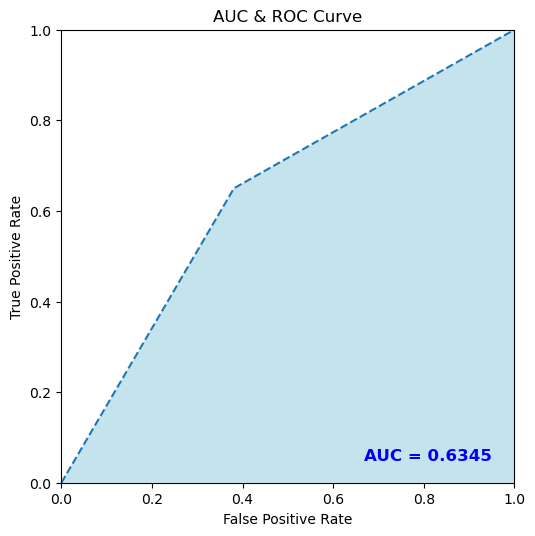

In [237]:
from sklearn import metrics
auc = metrics.roc_auc_score(y_test, y_pred)

false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, y_pred)

plt.figure(figsize=(6, 6), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate,'--' )
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightblue', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

## PCA using SVD

In [23]:
### PCA using SVD

X_centered = X - np.mean(X)
X_c = 1/(X.shape[0] - 1) * np.dot(np.transpose(X_centered), X_centered)
u, s, vt = np.linalg.svd(X_c, full_matrices = False)

C:\Users\Devi C Arati\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [24]:
X_c

array([[ 1.64300203e-01,  9.99710229e-03,  8.01217039e-02, ...,
         2.40241571e-02,  2.53987802e-02,  2.13013515e-02],
       [ 9.99710229e-03,  2.14503043e-01, -7.89626195e-03, ...,
         1.75706058e-04,  9.66553288e-03,  1.53783234e-02],
       [ 8.01217039e-02, -7.89626195e-03,  2.02332657e-01, ...,
         1.60067152e-02,  1.71973962e-02,  2.64125366e-03],
       ...,
       [ 2.40241571e-02,  1.75706058e-04,  1.60067152e-02, ...,
         6.11799043e-02,  4.50090165e-02,  9.18848550e-03],
       [ 2.53987802e-02,  9.66553288e-03,  1.71973962e-02, ...,
         4.50090165e-02,  5.24087403e-02,  2.19623705e-02],
       [ 2.13013515e-02,  1.53783234e-02,  2.64125366e-03, ...,
         9.18848550e-03,  2.19623705e-02,  3.90104823e-02]])

In [25]:
D = s
D = (D/D.sum())*100

print('S : ',s)
print('\nD : ', D)
print('Max(s) : ', s.max())
print('Min(s) : ', s.min())
print('Max(D) : ', D.max())
print('Min(D) : ', D.min())

S :  [7.21046728e-01 4.22332465e-01 3.65837891e-01 3.25698509e-01
 2.63801318e-01 2.32863270e-01 2.03575514e-01 1.91614692e-01
 1.62261393e-01 1.46124477e-01 1.39968550e-01 1.29210953e-01
 1.11915489e-01 1.09193933e-01 9.89042547e-02 9.13694899e-02
 7.87185581e-02 7.25158481e-02 6.48432736e-02 5.31274283e-02
 5.04479331e-02 4.99029942e-02 4.74525419e-02 4.32313713e-02
 3.88607379e-02 3.77887749e-02 3.40064731e-02 2.84304056e-02
 2.73270119e-02 2.46663043e-02 2.22893867e-02 2.08598301e-02
 1.85420666e-02 1.72006452e-02 1.66119416e-02 1.41281604e-02
 1.23278162e-02 1.00087154e-02 8.43175250e-03 7.40307912e-03
 6.16322309e-03 5.55201413e-03 4.73465077e-03 4.32868455e-03
 3.91014288e-03 3.68569813e-03 2.99806844e-03 2.52362151e-03
 3.40135038e-04]

D :  [1.58503920e+01 9.28391303e+00 8.04202243e+00 7.15965947e+00
 5.79900599e+00 5.11891111e+00 4.47509373e+00 4.21216525e+00
 3.56690709e+00 3.21217771e+00 3.07685521e+00 2.84037659e+00
 2.46017948e+00 2.40035295e+00 2.17416035e+00 2.00852757e

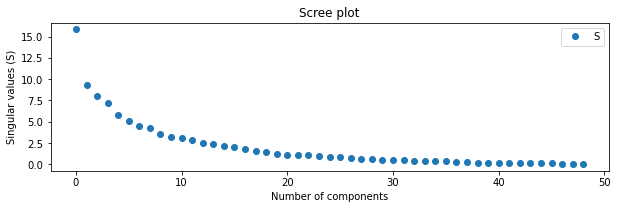

In [26]:
fig = plt.subplots(1,figsize=(10,6))
plt.subplot(211)
plt.xlabel('Number of components')
plt.ylabel('Singular values (S)')
plt.title('Scree plot')

plt.plot(D,'o')
plt.legend('Singular values')

In [27]:
# Considering the elbow point to be 8 from the scree plot

In [35]:
X_10pcs = (X_centered @ vt[:10].T).rename(columns = {0: 'pc1', 1: 'pc2',2: 'pc3',3: 'pc4',4: 'pc5',5: 'pc6', 6:'pc7', 7:'pc8',8:'pc9',9:'pc10'})
X_10pcs

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10
0,0.162442,-0.629973,-1.146861,0.000550,0.439264,-0.400459,-0.054846,-0.223027,0.341841,0.137175
1,0.825106,-0.256468,-1.117247,0.087155,-0.864338,-0.167709,-0.558583,-0.122507,-0.442626,0.317589
2,0.182621,-0.329224,0.667420,0.629155,0.059692,-0.511092,0.563964,-0.386887,-0.979362,0.544750
3,0.907619,-1.028135,0.337259,0.715361,0.185362,-0.465693,-0.240251,-0.450746,0.139717,-0.423258
4,0.707936,-0.185357,0.140857,1.190873,0.365239,-0.321138,0.489991,0.635936,-0.669928,-0.014346
...,...,...,...,...,...,...,...,...,...,...
199,0.570544,0.513244,-1.136806,-0.532396,-1.260209,0.330673,-0.015739,-0.435035,0.588540,0.307933
200,0.433362,-0.383604,0.326540,-0.671616,0.162891,-0.315232,-0.090635,0.644356,0.617257,0.764449
201,0.262183,-0.107736,0.306222,-0.356813,0.763042,-0.417377,0.243509,0.683984,0.321821,-0.039108
202,-0.336368,-1.064904,0.823925,-0.382916,-0.910626,0.007617,0.318735,-0.258442,0.217745,-0.253567


In [36]:
# 'X_10pcs' is the new reduced set of features

# SVM on the dataset

## Before dimensionality reduction

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [38]:
from datetime import datetime
start_time = datetime.now()

#Create a svm Classifier
clf = svm.SVC(C=15,kernel='rbf') # Polynomial Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Duration: 0:00:00.003975


In [39]:
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix,ConfusionMatrixDisplay

print("f1 score : ",f1_score(y_test, y_pred, average="macro"))
print("precision : ",precision_score(y_test, y_pred, average="macro"))
print("recall : ",recall_score(y_test, y_pred, average="macro"))  
print("accuracy:",accuracy_score(y_test, y_pred))

f1 score :  0.8528708133971292
precision :  0.857487922705314
recall :  0.8523809523809525
accuracy: 0.8536585365853658


## After dimensionality Reduction (PCA-SVM)

In [222]:
X_train, X_test, y_train, y_test = train_test_split(X_10pcs, y, test_size=0.2, random_state=0)

In [248]:
start_time = datetime.now()

#Create a svm Classifier
clf = svm.SVC(C=8,kernel='poly') # Polynomial Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred_pca = clf.predict(X_test)

end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Duration: 0:00:00.003000


In [249]:
print("f1 score : ",f1_score(y_test, y_pred_pca, average="macro"))
print("precision : ",precision_score(y_test, y_pred_pca, average="macro"))
print("recall : ",recall_score(y_test, y_pred_pca, average="macro"))  
print("accuracy:",accuracy_score(y_test, y_pred_pca))

f1 score :  0.7317073170731706
precision :  0.7321428571428572
recall :  0.7321428571428572
accuracy: 0.7317073170731707


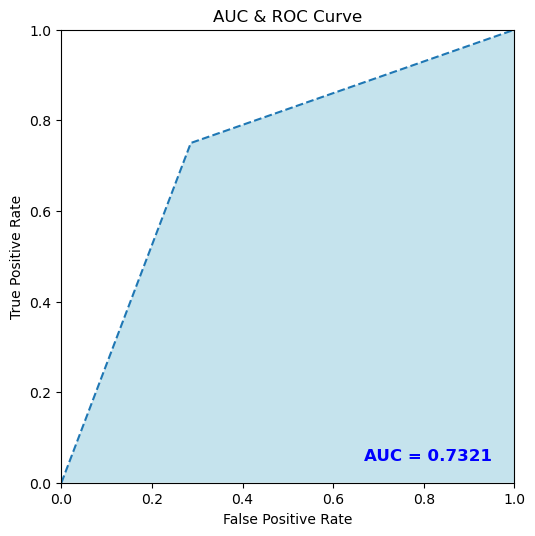

In [250]:
from sklearn import metrics
auc = metrics.roc_auc_score(y_test, y_pred_pca)

false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, y_pred_pca)

plt.figure(figsize=(6, 6), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate,'--' )
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightblue', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

# SVM after PCA - GRIDSEARCH CV

In [44]:
from sklearn.svm import SVC
model = SVC()
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1,10, 15,25], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.485 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.758 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.727 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.500 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.500 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.485 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.727 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.727 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.500 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.500 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.485 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 15, 25],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [45]:

# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 15, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=15, gamma=0.1)


In [46]:
#Create a svm Classifier
clf = svm.SVC(C=15,gamma=0.1, kernel='rbf') # Polynomial Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred_pcagrid = clf.predict(X_test)


In [47]:
print("f1 score : ",f1_score(y_test, y_pred_pcagrid, average="macro"))
print("precision : ",precision_score(y_test, y_pred_pcagrid, average="macro"))
print("recall : ",recall_score(y_test, y_pred_pcagrid, average="macro"))  
print("accuracy:",accuracy_score(y_test, y_pred_pcagrid))

f1 score :  0.7291291291291292
precision :  0.7365196078431373
recall :  0.7297619047619048
accuracy: 0.7317073170731707


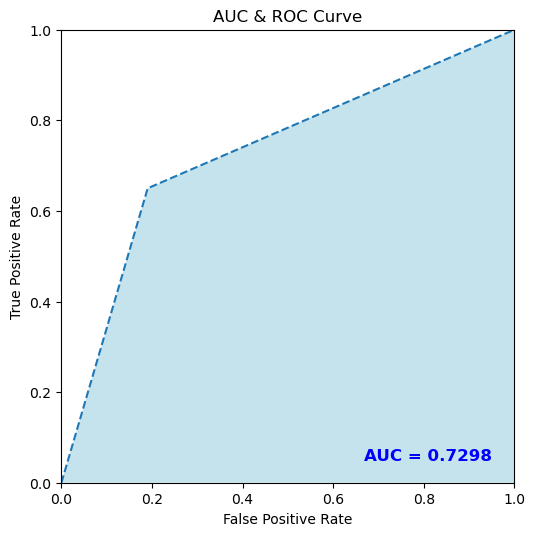

In [208]:
from sklearn import metrics
auc = metrics.roc_auc_score(y_test,y_pred_pcagrid)

false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, y_pred_pcagrid)

plt.figure(figsize=(6, 6), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate,'--' )
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightblue', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

##  Size of the dataset has been reduced, but performance of classifier has deteriorated

### Need for optimization of classifier hyper parameters

### Method 1.a - Bayesian Optimization with Gaussian Process (BO-GP)
PCA-OPTIMIZATION-SVM

In [51]:
#SVM
from skopt import Optimizer
from skopt import BayesSearchCV 
from skopt.space import Real, Categorical, Integer
rf_params = {
    'C': Real(0.01,50),
    "kernel":['linear','poly','rbf','sigmoid']
}
clf = svm.SVC(gamma = 'scale')
Bayes = BayesSearchCV(clf, rf_params,cv=3,n_iter=40, n_jobs=-1,scoring='accuracy')
Bayes.fit(X_10pcs, y)
print(Bayes.best_params_)
bclf = Bayes.best_estimator_
print("Accuracy:"+ str(Bayes.best_score_))

C:\Users\Devi C Arati\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Devi C Arati\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Devi C Arati\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Devi C Arati\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Devi C Arati\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective h

OrderedDict([('C', 33.38846901215499), ('kernel', 'rbf')])
Accuracy:0.7647058823529411


In [52]:
bclf

SVC(C=33.38846901215499)

In [54]:
start_time = datetime.now()

#Create an svm Classifier
clf1 = svm.SVC(C=33.388469,kernel='rbf') # rbf Kernel

#Train the model using the training sets
clf1.fit(X_train, y_train)

#Predict the response for test dataset
y_pred1 = clf1.predict(X_test)

end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Duration: 0:00:00


In [49]:
print("f1 score : ",f1_score(y_test, y_pred1, average="macro"))
print("precision : ",precision_score(y_test, y_pred1, average="macro"))
print("recall : ",recall_score(y_test, y_pred1, average="macro"))  
print("accuracy:",accuracy_score(y_test, y_pred1))

f1 score :  0.7291291291291292
precision :  0.7365196078431373
recall :  0.7297619047619048
accuracy: 0.7317073170731707


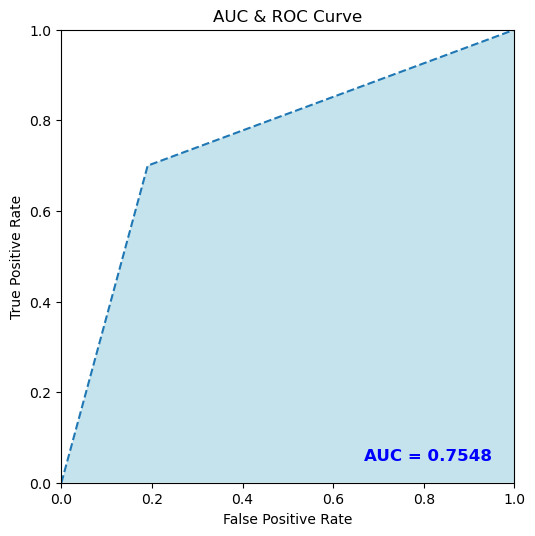

In [55]:
from sklearn import metrics
auc = metrics.roc_auc_score(y_test, y_pred1)

false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, y_pred1)

plt.figure(figsize=(6, 6), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate,'--' )
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightblue', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [45]:
# pip install scikit-optimize

### Method 1.b - Bayesian Optimization with Tree-structured Parzen Estimator (TPE)

In [65]:
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from sklearn.model_selection import cross_val_score, StratifiedKFold
def objective(params):
    params = {
        'C': abs(float(params['C'])), 
        "kernel":str(params['kernel'])
    }
    clf2 = svm.SVC(gamma='scale', **params)
    score = cross_val_score(clf, X_10pcs, y, scoring='accuracy', cv=StratifiedKFold(n_splits=3)).mean()

    return {'loss':score, 'status': STATUS_OK }

space = {
    'C': hp.normal('C', 0, 2),
    "kernel":hp.choice('kernel',['linear','poly','rbf','sigmoid'])
}

best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=20)
print("SVM: Hyperopt estimated optimum {}".format(best))


100%|██████████| 20/20 [00:00<00:00, 74.77trial/s, best loss: 0.7647058823529411]
SVM: Hyperopt estimated optimum {'C': 2.127147974332955, 'kernel': 3}


In [67]:
#Create a svm Classifier
clf2 = svm.SVC(C=2.127,kernel='sigmoid') # Polynomial Kernel

#Train the model using the training sets
clf2.fit(X_train, y_train)

#Predict the response for test dataset
y_pred2 = clf2.predict(X_test)

print("accuracy:",accuracy_score(y_test, y_pred2))

accuracy: 0.6829268292682927


In [68]:
print("f1 score : ",f1_score(y_test, y_pred2, average="macro"))
print("precision : ",precision_score(y_test, y_pred2, average="macro"))
print("recall : ",recall_score(y_test, y_pred2, average="macro"))  
print("accuracy:",accuracy_score(y_test, y_pred2))

f1 score :  0.6829268292682926
precision :  0.6833333333333333
recall :  0.6833333333333333
accuracy: 0.6829268292682927


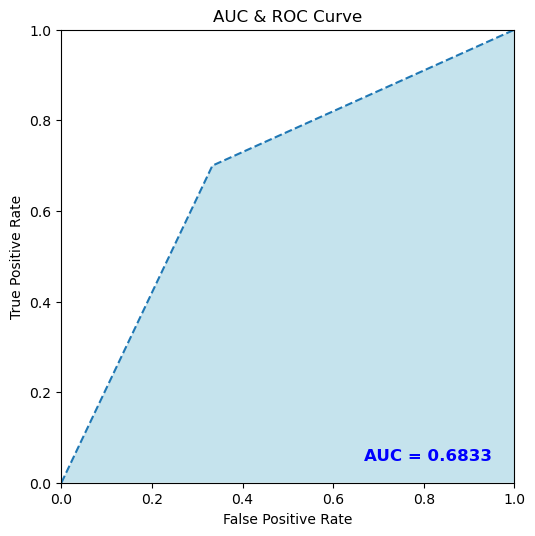

In [69]:
from sklearn import metrics
auc = metrics.roc_auc_score(y_test, y_pred2)

false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, y_pred2)

plt.figure(figsize=(6, 6), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate,'--' )
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightblue', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [108]:
# pip install hyperpot

### Method 2 - Genetic Algorithm

In [70]:
#SVM
from evolutionary_search import EvolutionaryAlgorithmSearchCV
rf_params = {
    'C': np.random.uniform(0,50,1000),
    "kernel":['linear','poly','rbf','sigmoid'],
    "gamma" : ['scale', 'auto']
}
clf3 = svm.SVC()
ga1 = EvolutionaryAlgorithmSearchCV(estimator=clf3,
                                   params=rf_params,
                                   scoring="accuracy",
                                   cv=5,
                                   verbose=1,
                                   population_size=100,
                                   gene_mutation_prob=0.20,
                                   gene_crossover_prob=0.5,
                                   tournament_size=5,
                                   generations_number=20,
                                   n_jobs=1)
ga1.fit(X_10pcs, y)
print(ga1.best_params_)
#print("Accuracy:"+ str(ga1.best_score_))

Types [2, 1, 1] and maxint [999, 3, 1] detected
--- Evolve in 8000 possible combinations ---
gen	nevals	avg     	min     	max     	std      
0  	100   	0.749265	0.519608	0.818627	0.0528475
1  	54    	0.781814	0.588235	0.818627	0.0279067
2  	62    	0.788824	0.553922	0.818627	0.0470214
3  	63    	0.796814	0.504902	0.818627	0.0608056
4  	56    	0.814461	0.759804	0.818627	0.0116699
5  	65    	0.808873	0.553922	0.818627	0.0349486
6  	57    	0.812255	0.612745	0.818627	0.0243869
7  	66    	0.810539	0.573529	0.818627	0.0283075
8  	56    	0.811176	0.529412	0.818627	0.0311919
9  	62    	0.811569	0.504902	0.818627	0.0343929
10 	59    	0.806029	0.558824	0.818627	0.042414 
11 	68    	0.810833	0.70098 	0.818627	0.0210282
12 	50    	0.815098	0.75    	0.818627	0.0118071
13 	66    	0.815049	0.730392	0.818627	0.0121041
14 	48    	0.812402	0.676471	0.818627	0.0214217
15 	67    	0.811225	0.598039	0.818627	0.026656 
16 	59    	0.815098	0.578431	0.818627	0.0243631
17 	64    	0.812353	0.647059	0.818627	0.024

In [110]:
# pip install sklearn-deap

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X_8pcs, y, test_size=0.2, random_state=0)
#Create a svm Classifier
clf = svm.SVC(C=23.572,kernel='poly',gamma='scale') # rbf Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred3 = clf.predict(X_test)

print("accuracy:",accuracy_score(y_test, y_pred3))

accuracy: 0.7560975609756098


In [72]:
print("f1 score : ",f1_score(y_test, y_pred3, average="macro"))
print("precision : ",precision_score(y_test, y_pred3, average="macro"))
print("recall : ",recall_score(y_test, y_pred3, average="macro"))  
print("accuracy:",accuracy_score(y_test, y_pred3))

f1 score :  0.7559523809523809
precision :  0.7559523809523809
recall :  0.7559523809523809
accuracy: 0.7560975609756098


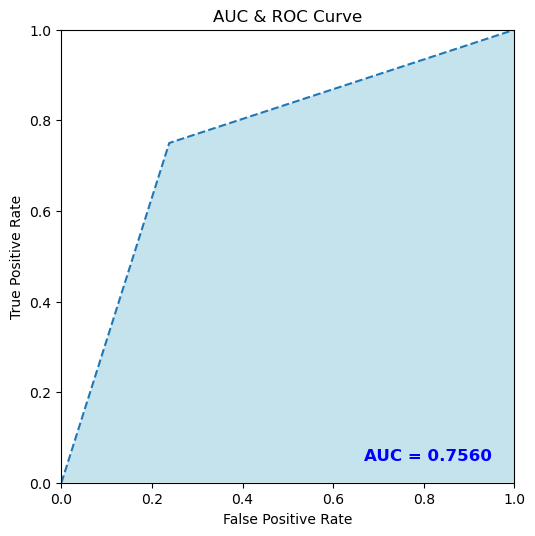

In [73]:
from sklearn import metrics
auc = metrics.roc_auc_score(y_test, y_pred3)

false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, y_pred3)

plt.figure(figsize=(6, 6), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate,'--' )
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightblue', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

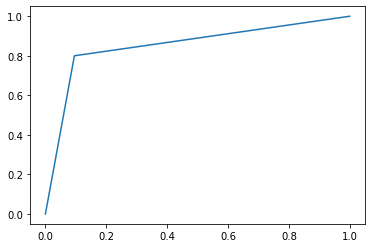

In [74]:
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Logistic Regression, AUC="+str(auc))

# USING RANDOM FOREST

Before dimensionality reduction.

In [75]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [76]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier=RandomForestClassifier(n_estimators=100).fit(X_train,y_train)
prediction=rf_classifier.predict(X_test)

In [77]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_test,prediction))
print(accuracy_score(y_test,prediction))
print(classification_report(y_test,prediction))

[[18  3]
 [ 4 16]]
0.8292682926829268
              precision    recall  f1-score   support

           0       0.82      0.86      0.84        21
           1       0.84      0.80      0.82        20

    accuracy                           0.83        41
   macro avg       0.83      0.83      0.83        41
weighted avg       0.83      0.83      0.83        41



AFTER LDA

In [78]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [79]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [80]:
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [81]:
param_grid = { 
    'n_estimators': [100,200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,7,8,10,50,100],
    'criterion' :['gini', 'entropy']
}

In [82]:

rfc=RandomForestClassifier(random_state=42)
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 7, 8, 10, 50, 100],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 200, 500]})

In [83]:
CV_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 4,
 'max_features': 'auto',
 'n_estimators': 100}

In [84]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier=RandomForestClassifier(n_estimators=100,criterion= 'entropy', max_depth=4, max_features='auto').fit(X_train,y_train)
prediction_lda=rf_classifier.predict(X_test)

In [85]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, prediction_lda)
print(cm)
print('Accuracy' + str(accuracy_score(y_test, prediction_lda)))

[[17  4]
 [ 8 12]]
Accuracy0.7073170731707317


In [207]:
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix,ConfusionMatrixDisplay

print("f1 score : ",f1_score(y_test, prediction_lda, average="macro"))
print("precision : ",precision_score(y_test,prediction_lda, average="macro"))
print("recall : ",recall_score(y_test, prediction_lda, average="macro"))  
print("accuracy:",accuracy_score(y_test, prediction_lda))

f1 score :  0.7028985507246377
precision :  0.7150000000000001
recall :  0.7047619047619047
accuracy: 0.7073170731707317


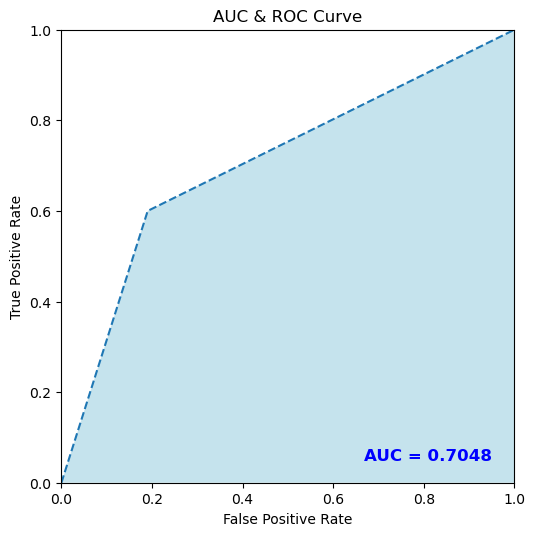

In [86]:
from sklearn import metrics
auc = metrics.roc_auc_score(y_test, prediction_lda)

false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, prediction_lda)

plt.figure(figsize=(6, 6), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate,'--' )
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightblue', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

AFTER PCA- DIMENSIONALITY REDUCTION

In [183]:
X_train, X_test, y_train, y_test = train_test_split(X_10pcs, y, test_size=0.2, random_state=0)

In [184]:
param_grid = { 
    'n_estimators': [100,200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,7,8,10,50,100],
    'criterion' :['gini', 'entropy']
}

# PCA- RF-gridsearch

In [185]:

rfc=RandomForestClassifier(random_state=42)
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 7, 8, 10, 50, 100],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 200, 500]})

In [186]:
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'max_features': 'auto',
 'n_estimators': 100}

In [190]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier=RandomForestClassifier(n_estimators=100,criterion='gini', max_depth=7,max_features='auto').fit(X_train,y_train)
pred_pca_rf_grid=rf_classifier.predict(X_test)

In [191]:
print("f1 score : ",f1_score(y_test, pred_pca_rf_grid, average="macro"))
print("precision : ",precision_score(y_test, pred_pca_rf_grid, average="macro"))
print("recall : ",recall_score(y_test, pred_pca_rf_grid, average="macro"))  
print("accuracy:",accuracy_score(y_test, pred_pca_rf_grid))

f1 score :  0.7524154589371981
precision :  0.76625
recall :  0.7535714285714286
accuracy: 0.7560975609756098


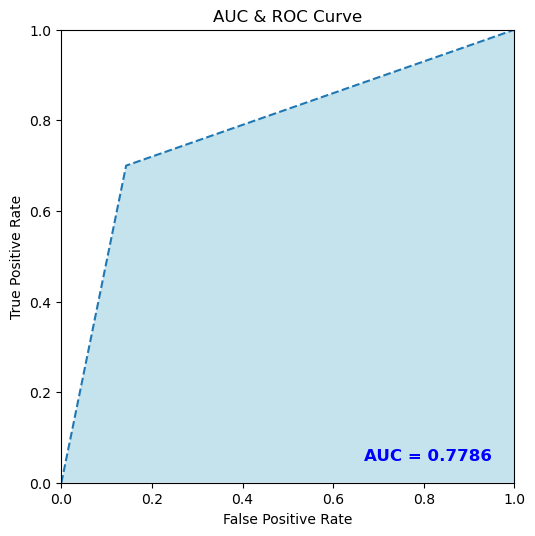

In [192]:
from sklearn import metrics
auc = metrics.roc_auc_score(y_test, prediction1)

false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, prediction1)

plt.figure(figsize=(6, 6), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate,'--' )
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightblue', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

# Bayesian Optimization GP - RANDOM FOREST HYPER PARAMETER TUNING

In [217]:
#Random Forest
from skopt import Optimizer
from skopt import BayesSearchCV 
from skopt.space import Real, Categorical, Integer
# Define the hyperparameter configuration space
rf_params = {
    'n_estimators': Integer(10,100),
    "max_features":Integer(1,8),
    'max_depth': Integer(5,50),
    "min_samples_split":Integer(2,11),
    "min_samples_leaf":Integer(1,11),
    "criterion":['gini','entropy']
}
gp_clf = RandomForestClassifier(random_state=0)
Bayes = BayesSearchCV(gp_clf, rf_params,cv=3,n_iter=20, n_jobs=-1,scoring='accuracy')
#number of iterations is set to 20, you can increase this number if time permits
Bayes.fit(X_10pcs,y)
print(Bayes.best_params_)
bclf = Bayes.best_estimator_
print("Accuracy:"+ str(Bayes.best_score_))

OrderedDict([('criterion', 'entropy'), ('max_depth', 25), ('max_features', 6), ('min_samples_leaf', 1), ('min_samples_split', 2), ('n_estimators', 100)])
Accuracy:0.8137254901960783


In [218]:
X_train, X_test, y_train, y_test = train_test_split(X_10pcs, y, test_size=0.2, random_state=0)
trainedforest_gp = RandomForestClassifier(criterion = 'entropy', max_depth = 25, 
                                       max_features = 6, 
                                       min_samples_leaf = 1, 
                                       min_samples_split = 2, 
                                       n_estimators = 100).fit(X_train,y_train)
predictionforest_gp = trainedforest_gp.predict(X_test)
print(confusion_matrix(y_test,predictionforest_gp))
print(accuracy_score(y_test,predictionforest_gp))
print(classification_report(y_test,predictionforest_gp))
acc5 = accuracy_score(y_test,predictionforest_gp)

[[19  2]
 [ 6 14]]
0.8048780487804879
              precision    recall  f1-score   support

           0       0.76      0.90      0.83        21
           1       0.88      0.70      0.78        20

    accuracy                           0.80        41
   macro avg       0.82      0.80      0.80        41
weighted avg       0.82      0.80      0.80        41



In [219]:
print("f1 score : ",f1_score(y_test, predictionforest_gp, average="macro"))
print("precision : ",precision_score(y_test,predictionforest_gp, average="macro"))
print("recall : ",recall_score(y_test, predictionforest_gp, average="macro"))  
print("accuracy:",accuracy_score(y_test, predictionforest_gp))

f1 score :  0.8019323671497585
precision :  0.8175
recall :  0.8023809523809524
accuracy: 0.8048780487804879


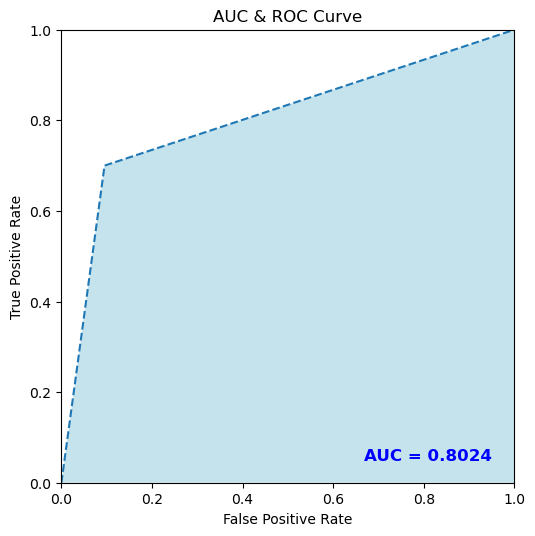

In [220]:
from sklearn import metrics
auc = metrics.roc_auc_score(y_test, predictionforest_gp)

false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, predictionforest_gp)

plt.figure(figsize=(6, 6), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate,'--' )
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightblue', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

# Bayesian Optimization TPE - RANDOM FOREST HYPER PARAMETER TUNING

In [209]:
X_train, X_test, y_train, y_test = train_test_split(X_10pcs, y, test_size=0.2, random_state=0)
from hyperopt import hp,fmin,tpe,STATUS_OK,Trials
space = {'criterion': hp.choice('criterion', ['entropy', 'gini']),
        'max_dept': hp.quniform('max_depth', 10, 400, 10),
        'max_features': hp.choice('max_features', ['auto', 'sqrt','log2', None]),
        'min_samples_leaf': hp.uniform('min_samples_leaf', 0, 0.5),
        'min_samples_split' : hp.uniform ('min_samples_split', 0, 1),
        'n_estimators' : hp.choice('n_estimators', [10, 50, 300, 750, 1200,1300,1500])
        }

In [210]:
def objective(space):
    model = RandomForestClassifier(criterion = space['criterion'], 
                                 max_features = space['max_features'],
                                 min_samples_leaf = space['min_samples_leaf'],
                                 min_samples_split = space['min_samples_split'],
                                 n_estimators = space['n_estimators'], 
                                 )
    
    accuracy = cross_val_score(model, X_train, y_train, cv = 5).mean()

    # We aim to maximize accuracy, therefore we return it as a negative value
    return {'loss': accuracy, 'status':STATUS_OK}

In [211]:
from sklearn.model_selection import cross_val_score
trials = Trials()
best = fmin(fn= objective,
            space=space,
            algo= tpe.suggest,
            max_evals =50,
            trials=trials)
best

100%|██████████| 50/50 [06:08<00:00,  7.37s/trial, best loss: 0.4909090909090909]


{'criterion': 1,
 'max_depth': 250.0,
 'max_features': 2,
 'min_samples_leaf': 0.28812908967653367,
 'min_samples_split': 0.8362725390226804,
 'n_estimators': 4}

In [212]:
crit = {0: 'entropy', 1: 'gini'}
feat = {0: 'auto', 1: 'sqrt', 2: 'log2', 3: None}
est = {0: 10, 1: 50, 2: 300, 3: 750, 4: 1200,5:1300,6:1500}


print(crit[best['criterion']])
print(feat[best['max_features']])
print(est[best['n_estimators']])

gini
log2
1200


In [213]:
best['min_samples_leaf']

0.28812908967653367

In [214]:
trainedforest = RandomForestClassifier(criterion = crit[best['criterion']], max_depth = 200, 
                                       max_features = feat[best['max_features']], 
                                       min_samples_leaf = best['min_samples_leaf'], 
                                       min_samples_split = best['min_samples_split'], 
                                       n_estimators = est[best['n_estimators']]).fit(X_train,y_train)
predictionforest1 = trainedforest.predict(X_test)
print(confusion_matrix(y_test,predictionforest1))
print(accuracy_score(y_test,predictionforest1))
print(classification_report(y_test,predictionforest1))
acc5 = accuracy_score(y_test,predictionforest1)

[[ 0 21]
 [ 0 20]]
0.4878048780487805
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        21
           1       0.49      1.00      0.66        20

    accuracy                           0.49        41
   macro avg       0.24      0.50      0.33        41
weighted avg       0.24      0.49      0.32        41



C:\Users\Devi C Arati\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Devi C Arati\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Devi C Arati\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [215]:
print("f1 score : ",f1_score(y_test, predictionforest1, average="macro"))
print("precision : ",precision_score(y_test, predictionforest1, average="macro"))
print("recall : ",recall_score(y_test, predictionforest1, average="macro"))  
print("accuracy:",accuracy_score(y_test, predictionforest1))

f1 score :  0.32786885245901637
precision :  0.24390243902439024
recall :  0.5
accuracy: 0.4878048780487805


C:\Users\Devi C Arati\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


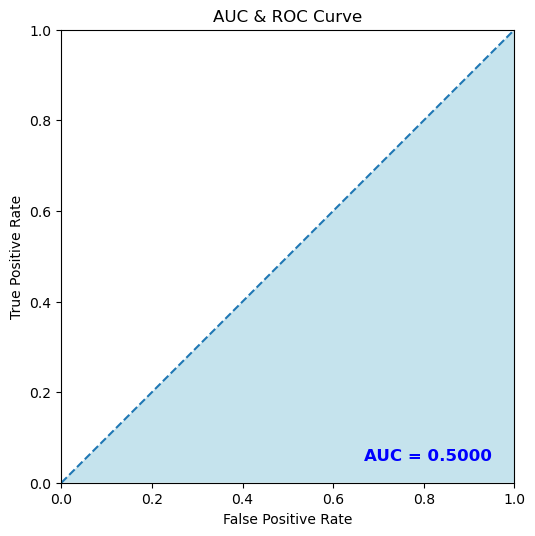

In [216]:
from sklearn import metrics
auc = metrics.roc_auc_score(y_test, predictionforest1)

false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, predictionforest1)

plt.figure(figsize=(6, 6), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate,'--' )
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightblue', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

# GENETIC ALGORITHM- RANDOM FOREST- PCA

In [165]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
# Create the random grid
param = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(param)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [190]:
#pip install tpot

  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11956 sha256=7e05bd0ad51349a0460b46ed17d505654b095063949656072f552bb73b8fdaef
  Stored in directory: c:\users\devi c arati\appdata\local\pip\cache\wheels\48\8c\93\3afb1916772591fe6bcc25cdf8b1c5bdc362f0ec8e2f0fd413
Successfully built stopit
Note: you may need to restart the kernel to use updated packages.


In [166]:
X_train, X_test, y_train, y_test = train_test_split(X_8pcs, y, test_size=0.2, random_state=0)

from tpot import TPOTClassifier

,
tpot_classifier = TPOTClassifier(generations= 10, population_size= 50, offspring_size= 12,
                                 verbosity= 2, early_stop= 12,mutation_rate=0.1,
                                 config_dict={'sklearn.ensemble.RandomForestClassifier': param}, 
                                 cv = 4, scoring = 'accuracy')
tpot_classifier.fit(X_train,y_train)

Optimization Progress:   0%|          | 0/170 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.8463414634146342

Generation 2 - Current best internal CV score: 0.8463414634146342

Generation 3 - Current best internal CV score: 0.8463414634146342

Generation 4 - Current best internal CV score: 0.8463414634146342

Generation 5 - Current best internal CV score: 0.8463414634146342

Generation 6 - Current best internal CV score: 0.8463414634146342

Generation 7 - Current best internal CV score: 0.8463414634146342

Generation 8 - Current best internal CV score: 0.8463414634146342

Generation 9 - Current best internal CV score: 0.8463414634146342

Generation 10 - Current best internal CV score: 0.8463414634146342

Best pipeline: RandomForestClassifier(input_matrix, criterion=gini, max_depth=120, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1800)


TPOTClassifier(config_dict={'sklearn.ensemble.RandomForestClassifier': {'criterion': ['entropy',
                                                                                      'gini'],
                                                                        'max_depth': [10,
                                                                                      120,
                                                                                      230,
                                                                                      340,
                                                                                      450,
                                                                                      560,
                                                                                      670,
                                                                                      780,
                                                                                 

In [168]:
accuracy = tpot_classifier.score(X_test, y_test)
print(accuracy)

0.7804878048780488


In [169]:
g_random_pred = tpot_classifier.predict(X_test)

In [170]:
g_random_pred

array([1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0])

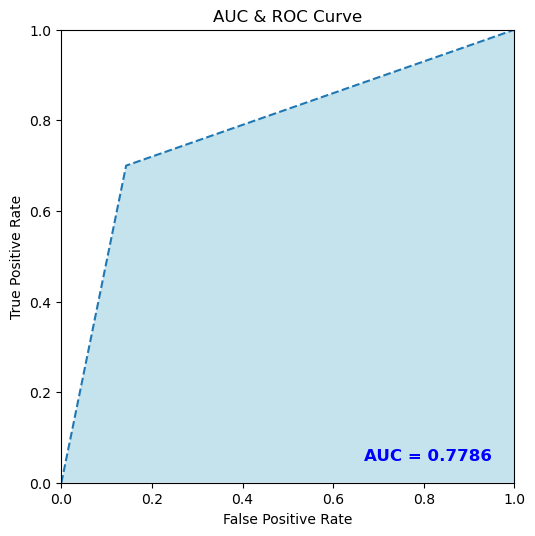

In [172]:
from sklearn import metrics
auc = metrics.roc_auc_score(y_test,  g_random_pred)

false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test,  g_random_pred)

plt.figure(figsize=(6, 6), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate,'--' )
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightblue', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [171]:
print("f1 score : ",f1_score(y_test, g_random_pred, average="macro"))
print("precision : ",precision_score(y_test, g_random_pred, average="macro"))
print("recall : ",recall_score(y_test, g_random_pred, average="macro"))  
print("accuracy:",accuracy_score(y_test, g_random_pred))

f1 score :  0.7783783783783783
precision :  0.7867647058823529
recall :  0.7785714285714285
accuracy: 0.7804878048780488


Text(0.5, 1.0, 'comparison of different models')

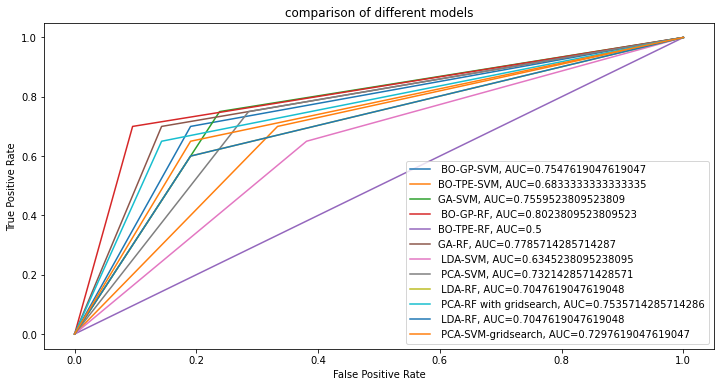

In [251]:
plt.figure(figsize=(12,6)).clf()

fpr, tpr, _ = metrics.roc_curve(y_test, y_pred1)
auc1 = metrics.roc_auc_score(y_test, y_pred1)
plt.plot(fpr,tpr,label=" BO-GP-SVM, AUC="+str(auc1))

fpr, tpr, _ = metrics.roc_curve(y_test, y_pred2)
auc2 = metrics.roc_auc_score(y_test, y_pred2)
plt.plot(fpr,tpr,label="BO-TPE-SVM, AUC="+str(auc2))

fpr, tpr, _ = metrics.roc_curve(y_test, y_pred3)
auc3 = metrics.roc_auc_score(y_test, y_pred3)
plt.plot(fpr,tpr,label="GA-SVM, AUC="+str(auc3))

fpr, tpr, _ = metrics.roc_curve(y_test, predictionforest_gp)
auc1 = metrics.roc_auc_score(y_test, predictionforest_gp)
plt.plot(fpr,tpr,label=" BO-GP-RF, AUC="+str(auc1))

fpr, tpr, _ = metrics.roc_curve(y_test, predictionforest1)
auc2 = metrics.roc_auc_score(y_test, predictionforest1)
plt.plot(fpr,tpr,label="BO-TPE-RF, AUC="+str(auc2))

fpr, tpr, _ = metrics.roc_curve(y_test, g_random_pred)
auc3 = metrics.roc_auc_score(y_test, g_random_pred)
plt.plot(fpr,tpr,label="GA-RF, AUC="+str(auc3))

fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc1 = metrics.roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label=" LDA-SVM, AUC="+str(auc1))

fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_pca)
auc1 = metrics.roc_auc_score(y_test, y_pred_pca)
plt.plot(fpr,tpr,label=" PCA-SVM, AUC="+str(auc1))

fpr, tpr, _ = metrics.roc_curve(y_test, prediction_lda)
auc1 = metrics.roc_auc_score(y_test, prediction_lda)
plt.plot(fpr,tpr,label=" LDA-RF, AUC="+str(auc1))

fpr, tpr, _ = metrics.roc_curve(y_test, pred_pca_rf_grid)
auc1 = metrics.roc_auc_score(y_test, pred_pca_rf_grid)
plt.plot(fpr,tpr,label=" PCA-RF with gridsearch, AUC="+str(auc1))

fpr, tpr, _ = metrics.roc_curve(y_test, prediction_lda)
auc1 = metrics.roc_auc_score(y_test, prediction_lda)
plt.plot(fpr,tpr,label=" LDA-RF, AUC="+str(auc1))

fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_pcagrid)
auc1 = metrics.roc_auc_score(y_test, y_pred_pcagrid)
plt.plot(fpr,tpr,label=" PCA-SVM-gridsearch, AUC="+str(auc1))
#add legend
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.title("comparison of different models")